In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [6]:
nums = [col for col in data.columns if data[col].dtype in ['int32', 'int64', 'float64']]
cats = [col for col in data.columns if col not in nums]

In [7]:
len(nums)

9

In [8]:
len(cats)

9

In [9]:
nums

['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

def plot_distribution(df, column_name):
    """
    Plots the distribution of a numerical feature in a DataFrame using Seaborn.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the numerical column to plot.

    Returns:
        None
    """
    # Create the distribution plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True, color='blue', bins=30)
    
    # Set the title and labels
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Show the plot
    plt.show()


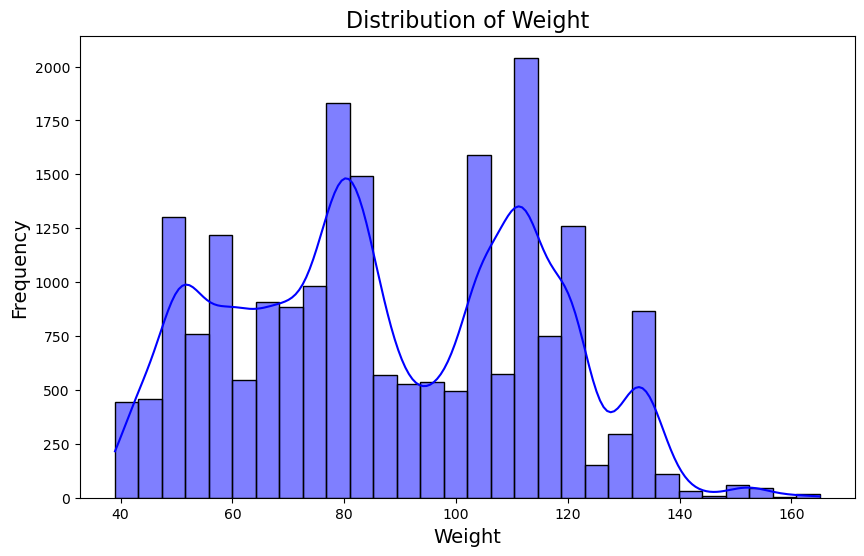

In [12]:
plot_distribution(data, 'Weight')

In [13]:
def plot_distribution(df, column_name, target_column=None):
    """
    Plots the distribution of a numerical feature in a DataFrame using Seaborn.
    Optionally colors the bars based on the class value of the corresponding target column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the numerical column to plot.
        target_column (str, optional): The name of the target column for coloring the bars. Default is None.

    Returns:
        None
    """

    # Create the distribution plot using Seaborn
    plt.figure(figsize=(10, 6))
    
    if target_column:
        sns.histplot(df, x=column_name, hue=target_column, kde=True, palette='husl', bins=30)
    else:
        sns.histplot(df[column_name], kde=True, color='blue', bins=30)
    
    # Set the title and labels
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Show the plot
    plt.legend(title=target_column)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


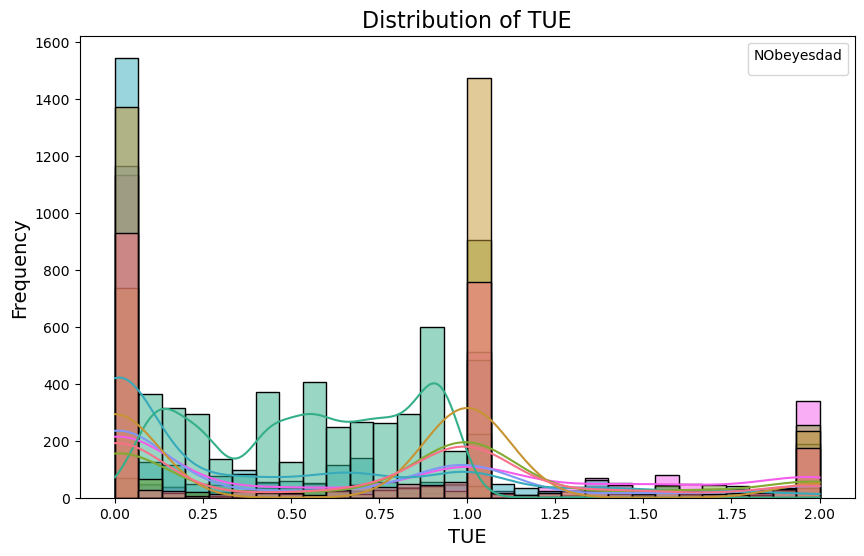

In [23]:
plot_distribution(data, 'TUE', target_column='NObeyesdad')

In [22]:
data['TUE'].value_counts()

TUE
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [24]:
def plot_numerical_relationship(df, x_column, y_column, target_column=None):
    """
    Plots the relationship between two numerical variables in a DataFrame using Seaborn.
    Optionally colors the points based on the class value of the corresponding target column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the numerical column to be plotted on the x-axis.
        y_column (str): The name of the numerical column to be plotted on the y-axis.
        target_column (str, optional): The name of the target column for coloring the points. Default is None.

    Returns:
        None
    """

    # Create the scatter plot using Seaborn
    plt.figure(figsize=(10, 6))
    
    if target_column:
        sns.scatterplot(data=df, x=x_column, y=y_column, hue=target_column, palette='husl')
    else:
        sns.scatterplot(data=df, x=x_column, y=y_column)
    
    # Set the title and labels
    plt.title(f'{x_column} vs {y_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    
    # Show the plot
    plt.legend(title=target_column)
    plt.show()

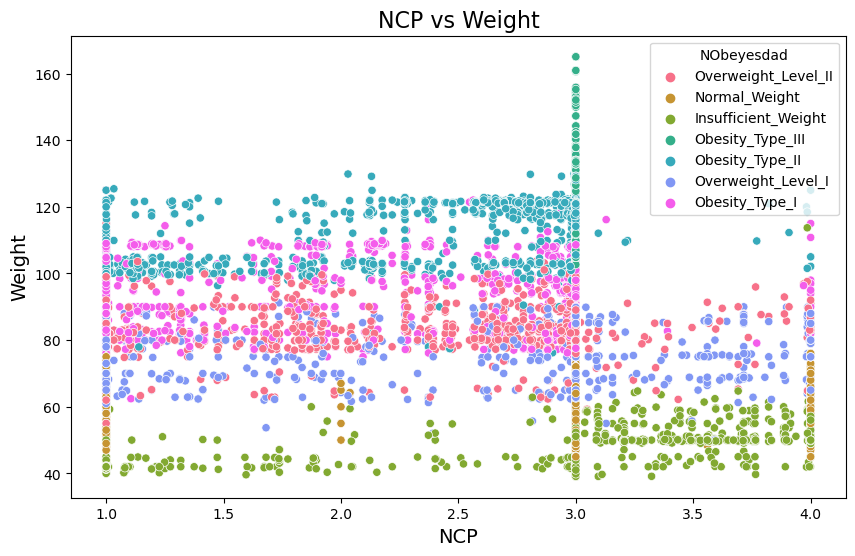

In [30]:
plot_numerical_relationship(data, 'NCP', 'Weight', target_column='NObeyesdad')

In [32]:
cats

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [33]:
data['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64